In [71]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import os


# Corrected file path using double backslashes
directory_path = "C:\\Users\\visal Adikari\\OneDrive\\Desktop\\uni sem 6\\ai\\assignmnet project\\rice_leaf_diseases"

# Iterating through the directory and printing file paths
for dirname, _, filenames in os.walk(directory_path):
    for filename in filenames:
        print(os.path.join(dirname, filename))

C:\Users\visal Adikari\OneDrive\Desktop\uni sem 6\ai\assignmnet project\rice_leaf_diseases\Bacterial leaf blight\DSC_0365.JPG
C:\Users\visal Adikari\OneDrive\Desktop\uni sem 6\ai\assignmnet project\rice_leaf_diseases\Bacterial leaf blight\DSC_0366.jpg
C:\Users\visal Adikari\OneDrive\Desktop\uni sem 6\ai\assignmnet project\rice_leaf_diseases\Bacterial leaf blight\DSC_0367.JPG
C:\Users\visal Adikari\OneDrive\Desktop\uni sem 6\ai\assignmnet project\rice_leaf_diseases\Bacterial leaf blight\DSC_0370.jpg
C:\Users\visal Adikari\OneDrive\Desktop\uni sem 6\ai\assignmnet project\rice_leaf_diseases\Bacterial leaf blight\DSC_0372.JPG
C:\Users\visal Adikari\OneDrive\Desktop\uni sem 6\ai\assignmnet project\rice_leaf_diseases\Bacterial leaf blight\DSC_0373.JPG
C:\Users\visal Adikari\OneDrive\Desktop\uni sem 6\ai\assignmnet project\rice_leaf_diseases\Bacterial leaf blight\DSC_0374.JPG
C:\Users\visal Adikari\OneDrive\Desktop\uni sem 6\ai\assignmnet project\rice_leaf_diseases\Bacterial leaf blight\DSC_0

In [72]:
!pip install opencv-python


Defaulting to user installation because normal site-packages is not writeable


In [73]:
!pip install tensorflow


Defaulting to user installation because normal site-packages is not writeable


In [74]:
!pip install tensorflow


Defaulting to user installation because normal site-packages is not writeable


In [75]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [76]:
data_dir = 'rice_leaf_diseases'

In [77]:
data_dir

'rice_leaf_diseases'

In [78]:
import pathlib
data_dir=pathlib.Path(data_dir)
data_dir

WindowsPath('rice_leaf_diseases')

In [79]:
list(data_dir.glob("*DSC*.jpg"))

[]

In [80]:
bacteria=list(data_dir.glob("Bacterial leaf blight/*"))
len(bacteria)

40

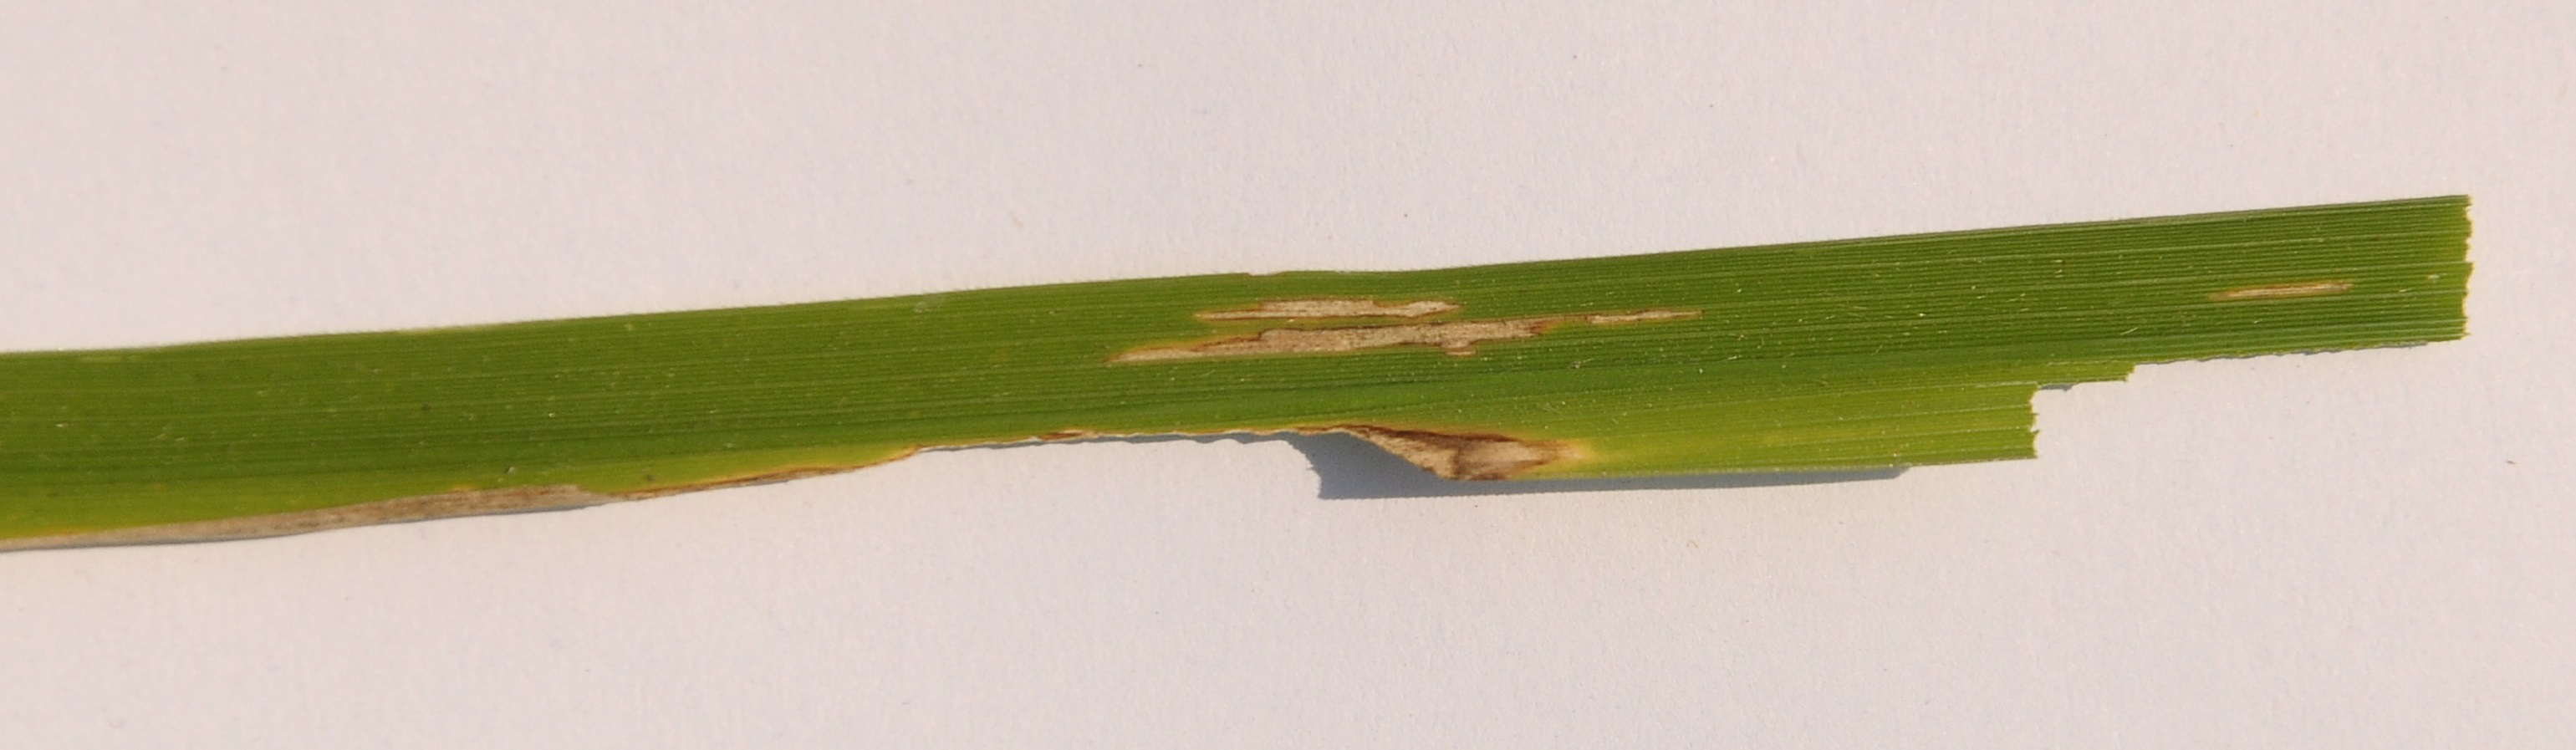

In [81]:
PIL.Image.open(str(bacteria[0]))

brown spot

In [82]:
brown=list(data_dir.glob("Brown spot/*"))
len(brown)

40

In [83]:
dict={"bacteria":list(data_dir.glob("Bacterial leaf blight/*")),"brown":list(data_dir.glob("Brown spot/*")),"smut":list(data_dir.glob("Leaf smut/*"))}

In [84]:
labels_dict = {
    'bacteria': 0,
    'brown': 1,
    'smut': 2,
   
}

In [85]:
str(dict["smut"][0])

'rice_leaf_diseases\\Leaf smut\\DSC_0293.JPG'

In [86]:
img=cv2.imread(str((dict["smut"][0])))

In [87]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [88]:
X, y = [], []

for name, images in dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(labels_dict[name])

In [89]:
y[:5]

[0, 0, 0, 0, 0]

In [90]:
X = np.array(X)
y = np.array(y)

# Plot the distribution of classes

In [91]:
import seaborn as sns
categories = ['Bacterial_leaf_blight', 'Brown_spot', 'Leaf_smut']

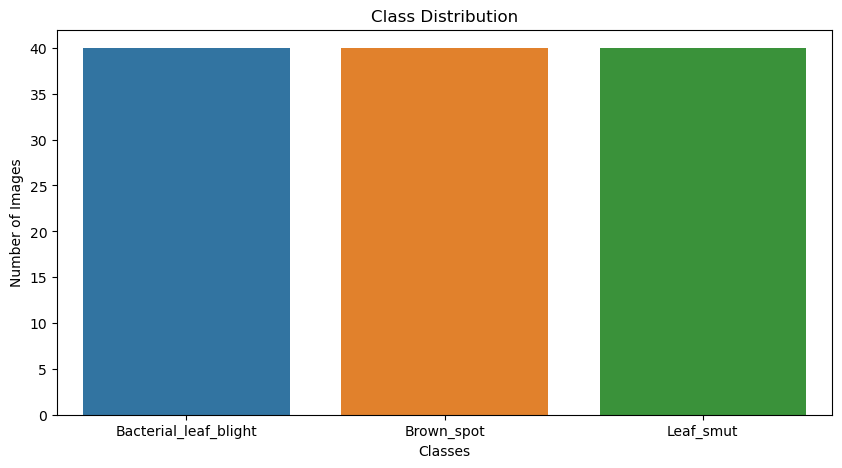

In [92]:

plt.figure(figsize=(10, 5))
sns.countplot(x=y)
plt.title('Class Distribution')
plt.xlabel('Classes')
plt.ylabel('Number of Images')
plt.xticks(ticks=range(len(categories)), labels=categories)
plt.show()

# Visualize sample images from each category

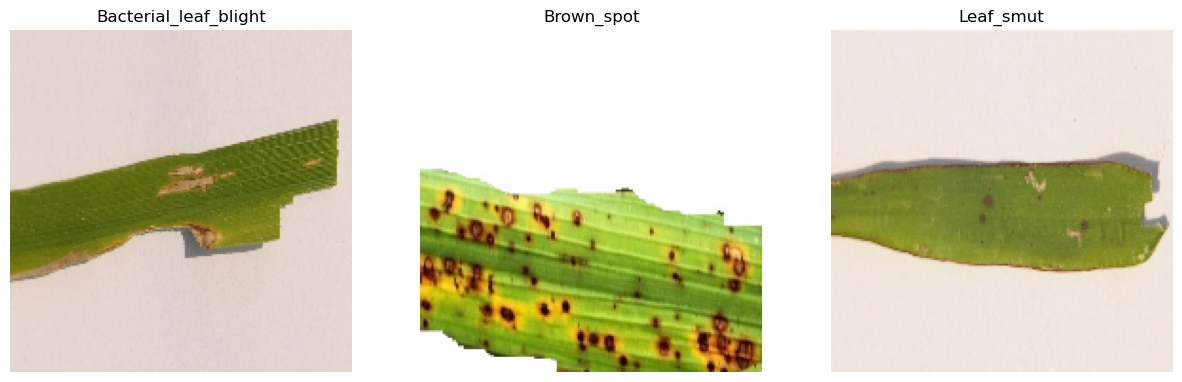

In [93]:

fig, ax = plt.subplots(1, len(categories), figsize=(15, 5))
for i, category in enumerate(categories):
    sample_idx = np.where(y == i)[0][0]
    ax[i].imshow(cv2.cvtColor(X[sample_idx], cv2.COLOR_BGR2RGB))
    ax[i].set_title(category)
    ax[i].axis('off')
plt.show()



## Convert images to grayscale to analyze brightness
Calculate the average brightness for each image
Plot the distribution of brightness

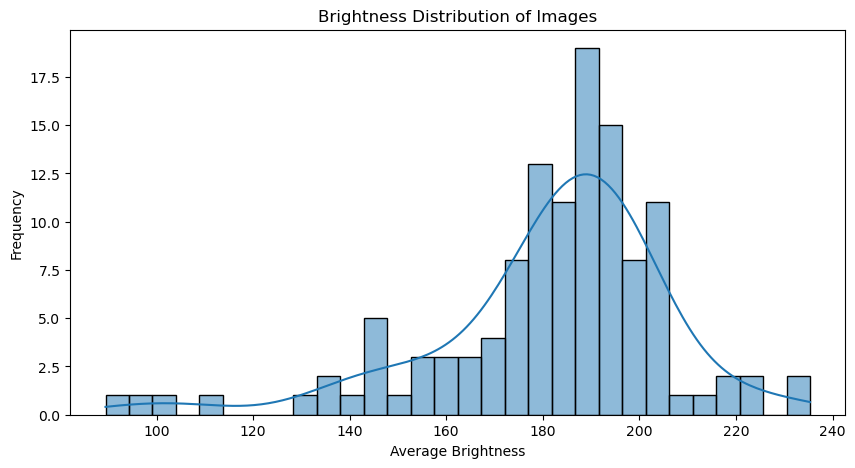

In [94]:

gray_images = [cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) for img in X]


brightness = [np.mean(img) for img in gray_images]

# Plot the distribution of brightness
plt.figure(figsize=(10, 5))
sns.histplot(brightness, kde=True, bins=30)
plt.title('Brightness Distribution of Images')
plt.xlabel('Average Brightness')
plt.ylabel('Frequency')
plt.show()



In [95]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [96]:
len(X_test)

30

In [97]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [98]:
num_classes = 3
model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=30)

Epoch 1/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 166ms/step - accuracy: 0.3424 - loss: 2.3879
Epoch 2/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 170ms/step - accuracy: 0.3696 - loss: 1.3011
Epoch 3/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step - accuracy: 0.3418 - loss: 1.1002
Epoch 4/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step - accuracy: 0.3813 - loss: 1.0821
Epoch 5/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step - accuracy: 0.4628 - loss: 1.0624
Epoch 6/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - accuracy: 0.5518 - loss: 1.0226
Epoch 7/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step - accuracy: 0.5841 - loss: 0.9599
Epoch 8/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step - accuracy: 0.5852 - loss: 0.9157
Epoch 9/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step - accuracy: 0.7055 - loss: 0.8537
Epoch 10/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - accuracy: 0.7065 - loss: 0.7140
Epoch 11/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step - accuracy: 0.7824 - loss: 0.6243
Epoch 12/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - accuracy: 0.8073 - lo

In [99]:
model.evaluate(X_test_scaled,y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step - accuracy: 0.6667 - loss: 1.4291


[1.429059386253357, 0.6666666865348816]

In [100]:
predictions = model.predict(X_test_scaled)
predictions


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


array([[ -4.2711167 ,  11.48994   ,   2.5833824 ],
       [  1.1137037 ,   4.310217  ,   2.92466   ],
       [  2.5451534 ,   3.1477878 ,   2.868995  ],
       [  6.474242  ,  -2.2717996 ,   4.4010057 ],
       [ -0.36801416,  -0.40632904,   6.9138904 ],
       [  6.5460324 ,   6.058322  ,  -1.0856515 ],
       [  5.7735124 ,  -2.0397224 ,   4.5416265 ],
       [ 10.143319  ,   4.239096  ,  -2.387307  ],
       [  4.855972  ,   6.083373  ,   2.9699967 ],
       [ -0.69605774,   1.7637334 ,   5.2482257 ],
       [  6.3742075 ,   3.7603374 ,   0.69556457],
       [-15.5245905 ,   4.123439  ,  15.157485  ],
       [  3.3584452 ,  -0.84923375,   5.124839  ],
       [  4.7356944 ,   3.6676354 ,   1.6451021 ],
       [  4.3313684 ,   3.4793983 ,   6.345142  ],
       [ -0.63631064,  -1.7456396 ,   7.799757  ],
       [  9.108798  ,   1.465781  ,   0.07985334],
       [ -4.65096   ,   6.7905097 ,   6.9746366 ],
       [  8.859479  ,   2.095796  ,   0.1732053 ],
       [  2.2817738 ,   6.18904

In [101]:
score = tf.nn.softmax(predictions[0])

In [102]:
np.argmax(score)

1

In [103]:
y_test[0]

1

In [104]:
data_augmentation = keras.Sequential(
  [
    layers.RandomZoom(0.2),
    layers.RandomRotation(0.1),
    layers.RandomFlip("horizontal"),
  ]
)

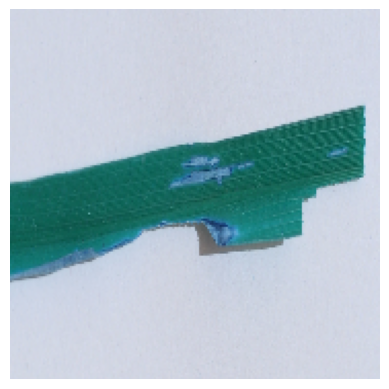

In [105]:
plt.axis('off')
plt.imshow(X[0])

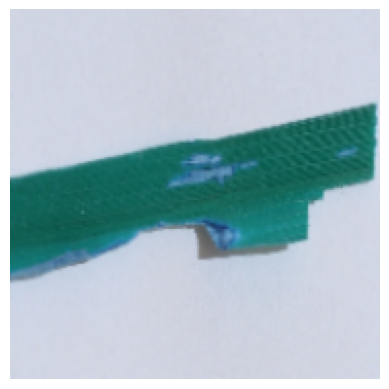

In [106]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))

In [107]:
num_classes = 3

model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.1),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=40) 

Epoch 1/40
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 170ms/step - accuracy: 0.4025 - loss: 1.3733
Epoch 2/40
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 166ms/step - accuracy: 0.3357 - loss: 1.2584
Epoch 3/40
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 173ms/step - accuracy: 0.4087 - loss: 1.0672
Epoch 4/40
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 171ms/step - accuracy: 0.4266 - loss: 1.0560
Epoch 5/40
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 189ms/step - accuracy: 0.5029 - loss: 1.0237
Epoch 6/40
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 163ms/step - accuracy: 0.5356 - loss: 0.9874
Epoch 7/40
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 186ms/step - accuracy: 0.5156 - loss: 0.9474
Epoch 8/40
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 162ms/step - accuracy: 0.6543 - loss: 0.8198
Epoch 9/40
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 181ms/step - accuracy: 0.6337 - loss: 0.8571
Epoch 10/40
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 167ms/step - accuracy: 0.6514 - loss: 0.7616
Epoch 11/40
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 167ms/step - accuracy: 0.7234 - loss: 0.7128
Epoch 12/40
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 165ms/step - accuracy: 0.6224 - lo

Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 247ms/step - accuracy: 0.8524 - loss: 0.2723 - val_accuracy: 0.8333 - val_loss: 0.3089
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 158ms/step - accuracy: 0.8633 - loss: 0.2931 - val_accuracy: 0.9444 - val_loss: 0.2542
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 160ms/step - accuracy: 0.8906 - loss: 0.2916 - val_accuracy: 0.9444 - val_loss: 0.2596
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 172ms/step - accuracy: 0.9045 - loss: 0.2161 - val_accuracy: 0.9444 - val_loss: 0.2452
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 175ms/step - accuracy: 0.9497 - loss: 0.1639 - val_accuracy: 0.9444 - val_loss: 0.2418
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 189ms/step - accuracy: 0.9301 - loss: 0.2365 - val_accuracy: 0.9444 - val_loss: 0.3120
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 176ms/step - accuracy: 0.9201 - loss: 0.1965 - val_accuracy: 0.7778 - val_loss: 0.4146
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 149ms/step - accuracy: 0.8759 - loss: 0.3286 - val_accuracy: 0.8333 - val_loss:

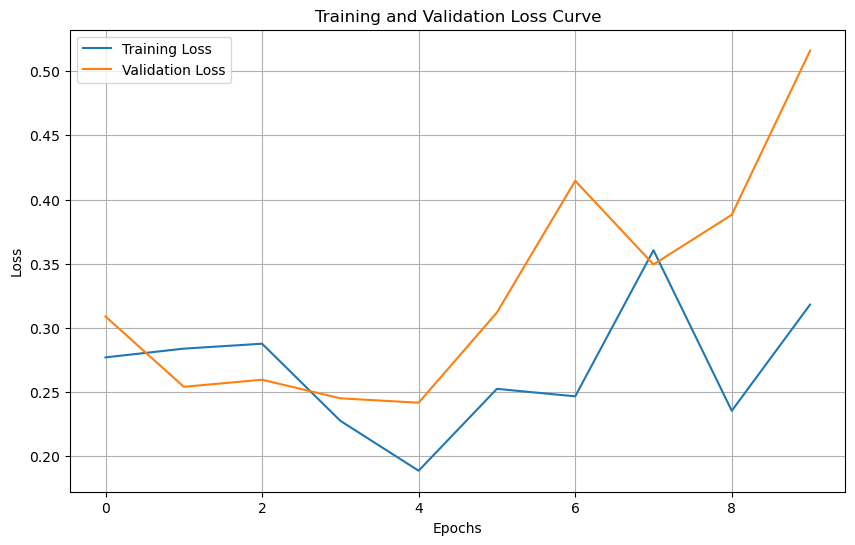

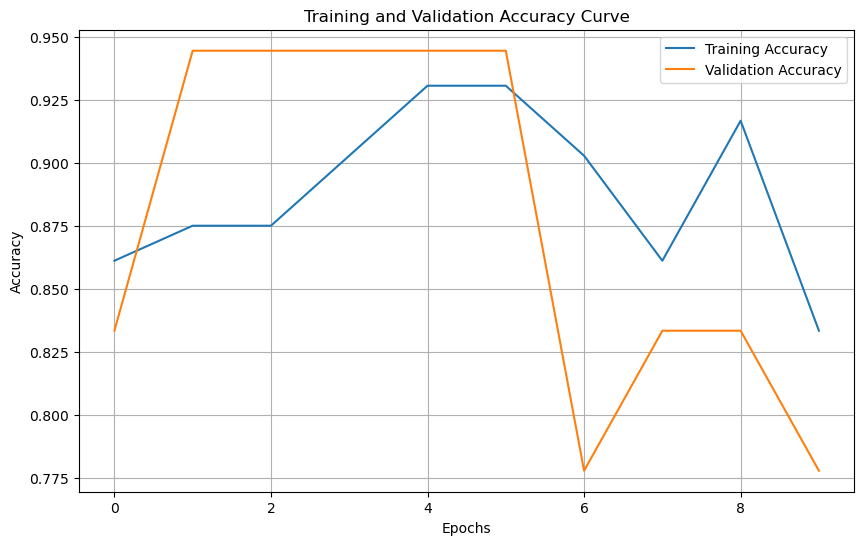

In [109]:
# Model training
history = model.fit(X_train_scaled, y_train, epochs=10, validation_split=0.2)

# Plotting the loss curve
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Plotting the accuracy curve
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
model.evaluate(X_test_scaled,y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step - accuracy: 0.8333 - loss: 0.3466


[0.3465757966041565, 0.8333333134651184]

In [116]:
# Evaluating the model on the test set
loss, accuracy = model.evaluate(X_test_scaled, y_test, verbose=2)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')



1/1 - 0s - 132ms/step - accuracy: 0.7333 - loss: 0.5651
Test Loss: 0.5651350021362305
Test Accuracy: 0.7333333492279053


In [118]:
# Predict probabilities for each class
predicted_probabilities = model.predict(X_test_scaled)

# Convert probabilities to class labels
predicted_classes = np.argmax(predicted_probabilities, axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


In [119]:

import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
conf_matrix = confusion_matrix(y_test, predicted_classes)


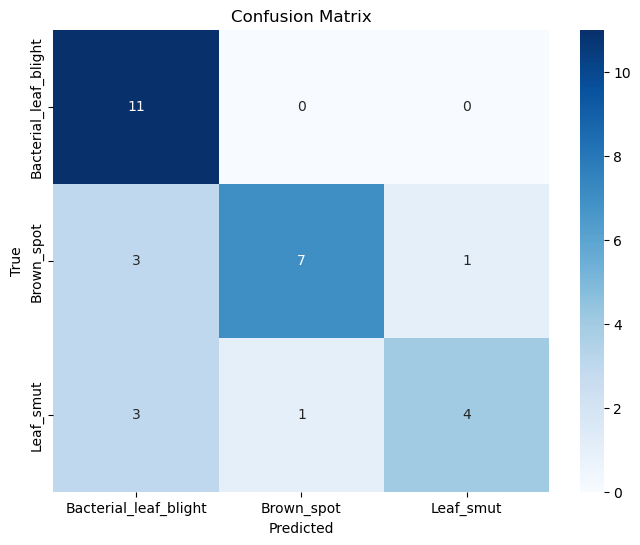

In [122]:
# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, predicted_classes)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=categories, 
            yticklabels=categories)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()



In [121]:
print(classification_report(y_test, predicted_classes, target_names=[f'Class {i}' for i in range(num_classes)]))


              precision    recall  f1-score   support

     Class 0       0.65      1.00      0.79        11
     Class 1       0.88      0.64      0.74        11
     Class 2       0.80      0.50      0.62         8

    accuracy                           0.73        30
   macro avg       0.77      0.71      0.71        30
weighted avg       0.77      0.73      0.72        30

